

# Loan Default Probability 


<a id='0'></a>
# 1. Problem Definition

The problem is defined in the classification framework,to Predict Loan Default Probablity

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# load dataset
loans = pd.read_csv('Default_Fin.csv',low_memory=False)

In [3]:
dataset = loans

In [4]:
df = loans

In [5]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.2.2'></a>
### Data Transformation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle Missing Values
imputer = SimpleImputer(strategy="mean")  # Use mean imputation
dataset["Bank Balance"] = imputer.fit_transform(dataset[["Bank Balance"]])
dataset["Annual Salary"] = imputer.fit_transform(dataset[["Annual Salary"]])

In [8]:
df.drop('Index',axis=1,inplace=True)

In [9]:
# Handle Outliers (using manual winsorization)
def winsorize_column(column, lower_limit, upper_limit):
    p = np.percentile(column, [lower_limit, upper_limit])
    column[column < p[0]] = p[0]
    column[column > p[1]] = p[1]
    return column

In [10]:
dataset["Bank Balance"] = winsorize_column(dataset["Bank Balance"], 5, 95)
dataset["Annual Salary"] = winsorize_column(dataset["Annual Salary"], 5, 95)

In [11]:
#Descriptive Statistics
dataset.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,9899.820996,400951.079556,0.033300
std,0.455795,5535.448651,152529.907356,0.179428
min,0.000000,5.142000,161181.228000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,19991.496000,656134.650000,1.000000


In [12]:
df = df.rename(columns={"Defaulted?": "Defaulted"})

In [13]:
# Feature Engineering
df["Debt-to-Income Ratio"] = df["Bank Balance"] / df["Annual Salary"]

# Verify the new feature
print(df.head())

   Employed  Bank Balance  Annual Salary  Defaulted  Debt-to-Income Ratio
0         1       8754.36     532339.560          0              0.016445
1         0       9806.16     161181.228          0              0.060839
2         1      12882.60     381205.680          0              0.033794
3         1       6351.00     428453.880          0              0.014823
4         1       9427.92     461562.000          0              0.020426


<a id='2.2'></a>
## 3.2. Data Visualization

<Axes: xlabel='Annual Salary', ylabel='Density'>

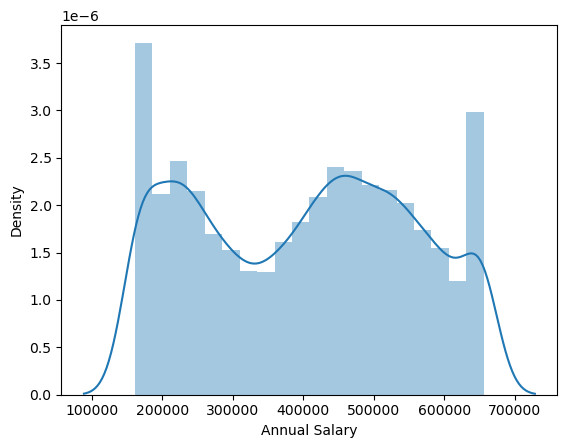

In [14]:
sns.distplot(df['Annual Salary'])

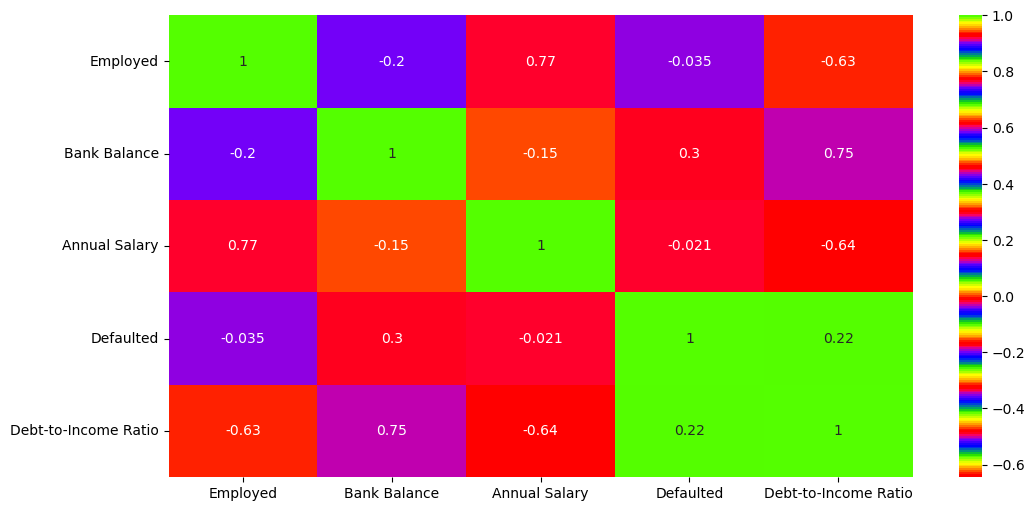

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='prism')
plt.show()


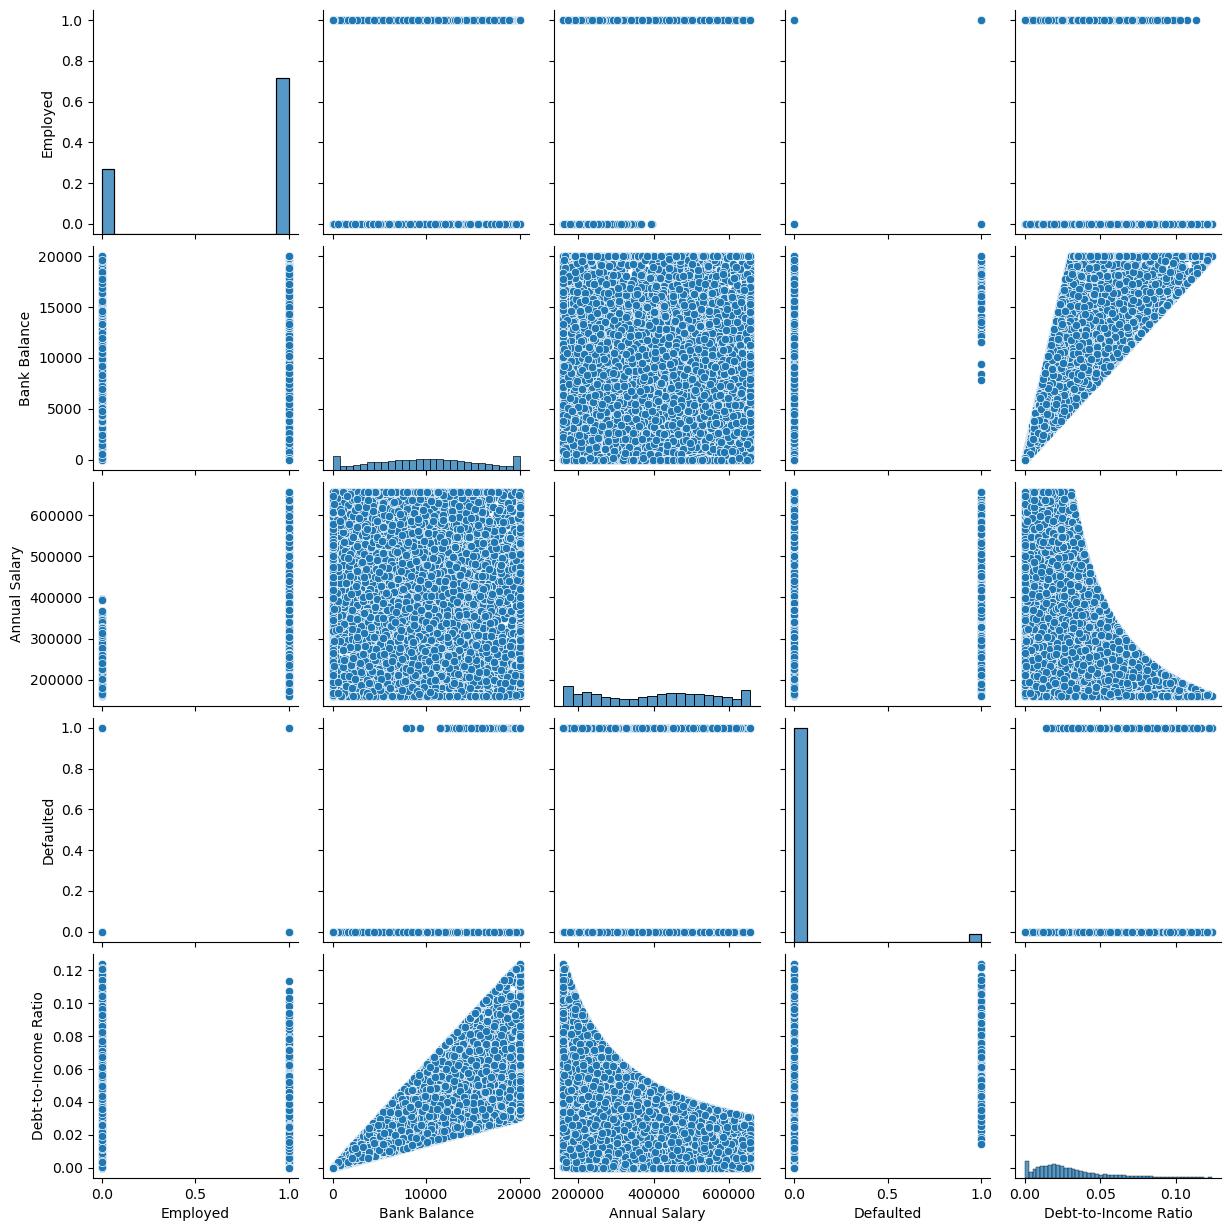

In [16]:
sns.pairplot(df)

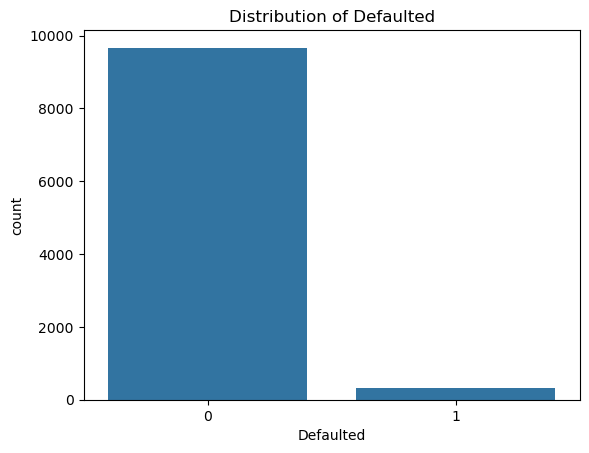

In [17]:
sns.countplot(x="Defaulted", data=df)
plt.title("Distribution of Defaulted")
plt.show()

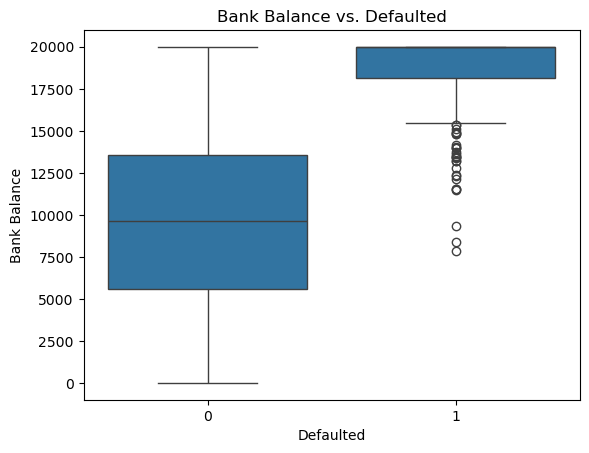

In [18]:
sns.boxplot(x="Defaulted", y="Bank Balance", data=df)
plt.title("Bank Balance vs. Defaulted")
plt.show()


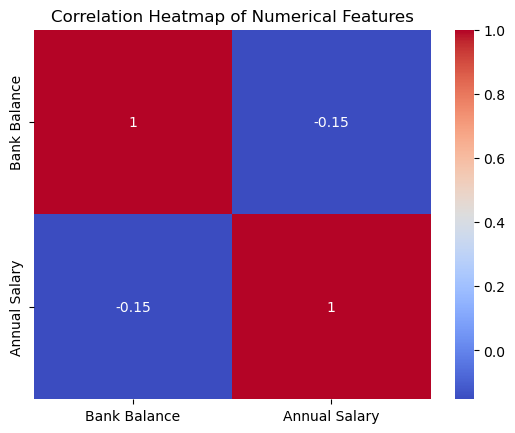

In [19]:
# Correlation heatmap of numerical features
numerical_features = ["Bank Balance", "Annual Salary"]
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<a id='3'></a>
# 4. Exploratory Analysis

In [20]:
dataset.shape

(10000, 4)

In [21]:
dataset.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [22]:
dataset[dataset.duplicated()]

,Employed,Bank Balance,Annual Salary,Defaulted?
477,0,19991.496,161181.228,0
686,0,19991.496,161181.228,0
1310,0,5.142,161181.228,0
1728,0,19991.496,161181.228,0
1940,1,5.142,656134.650,0
...,...,...,...,...
9257,1,5.142,656134.650,0
9280,1,19991.496,656134.650,0
9351,1,5.142,656134.650,0
9566,0,19991.496,161181.228,0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [25]:
dataset.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.199401,0.766607,-0.035420
Bank Balance,-0.199401,1.000000,-0.152212,0.297336
Annual Salary,0.766607,-0.152212,1.000000,-0.021278
Defaulted?,-0.035420,0.297336,-0.021278,1.000000


In [26]:
loan_data = dataset

<a id='4.1'></a>
## 5.1. Train Test Split

In [27]:
# split out validation dataset for the end
# Splitting Data
X = dataset[["Employed", "Bank Balance", "Annual Salary"]]  # Features
y = dataset["Defaulted?"]  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaled, y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [28]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
scoring ='precision'
scoring ='recall'
scoring = 'roc_auc'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Classification Models

In [29]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

### K-folds cross validation

In [30]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed , shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.945990 (0.019798)
LDA: 0.944730 (0.019517)
KNN: 0.806789 (0.043646)
CART: 0.649499 (0.044403)
NB: 0.935178 (0.017416)
AB: 0.945563 (0.019405)
GBM: 0.941391 (0.018776)
RF: 0.859375 (0.037724)
ET: 0.765165 (0.045544)


### Algorithm comparison

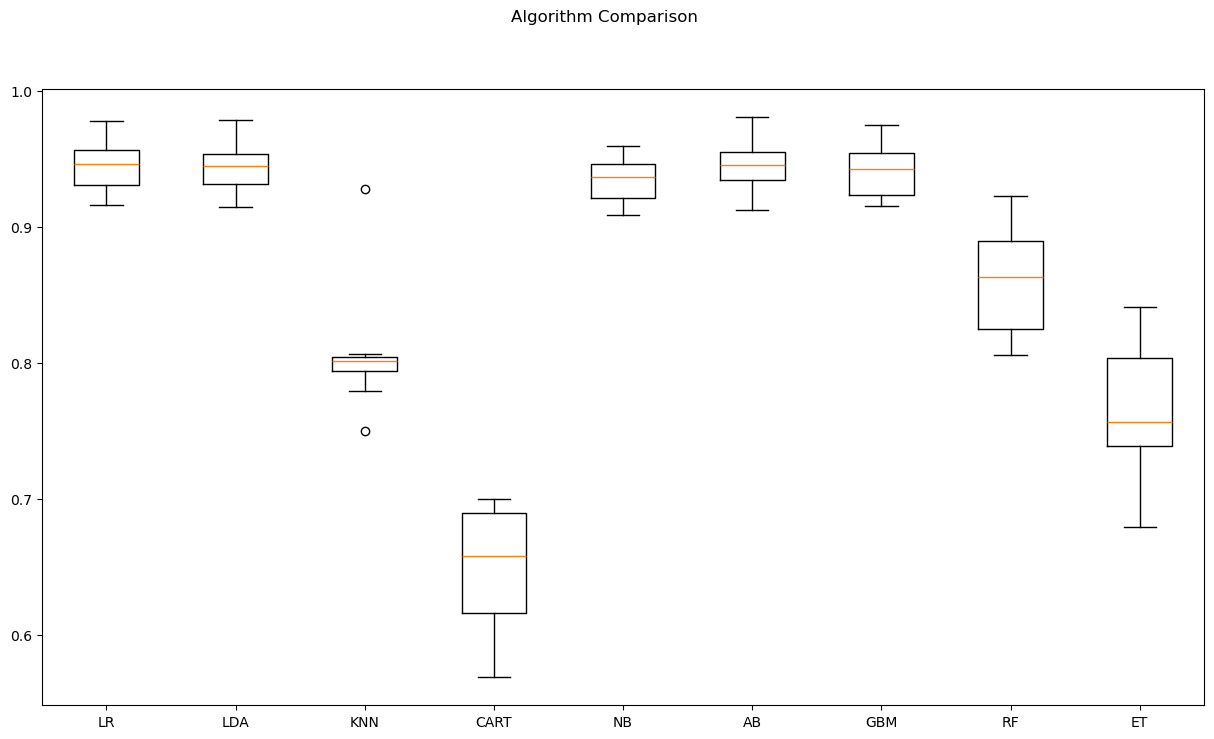

In [31]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

Given that the GBM is the best model, Grid Search is performed on GBM in this step.

In [32]:
# Grid Search: GradientBoosting Tuning
n_estimators = [20,180]
max_depth= [3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.941949 using {'max_depth': 5, 'n_estimators': 20}
#2 0.940816 (0.021927) with: {'max_depth': 3, 'n_estimators': 20}
#3 0.936350 (0.022374) with: {'max_depth': 3, 'n_estimators': 180}
#1 0.941949 (0.018739) with: {'max_depth': 5, 'n_estimators': 20}
#4 0.935873 (0.019746) with: {'max_depth': 5, 'n_estimators': 180}


<a id='6'></a>
# 7. Finalise the Model

Looking at the details above GBM might be worthy of further study

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [33]:
# prepare model
model = GradientBoostingClassifier(max_depth= 5, n_estimators= 180)
model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=180)

In [34]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.96
[[1906   27]
 [  53   14]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1933
           1       0.34      0.21      0.26        67

    accuracy                           0.96      2000
   macro avg       0.66      0.60      0.62      2000
weighted avg       0.95      0.96      0.96      2000



<Axes: xlabel='Predicted', ylabel='Actual'>

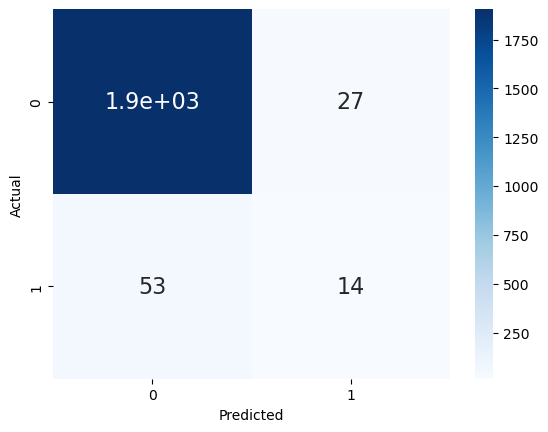

In [35]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

[0.01235554 0.66529938 0.32234508]


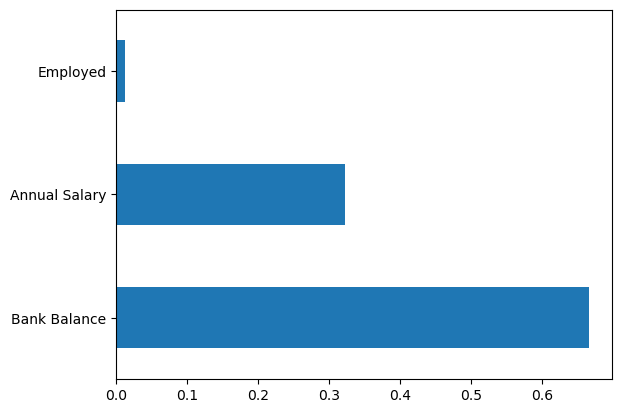

In [36]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

__Conclusion__:

Finally, we analyzed the feature importance and found that results of the case study
are quite intuitive.

